[*********************100%%**********************]  1 of 1 completed


c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


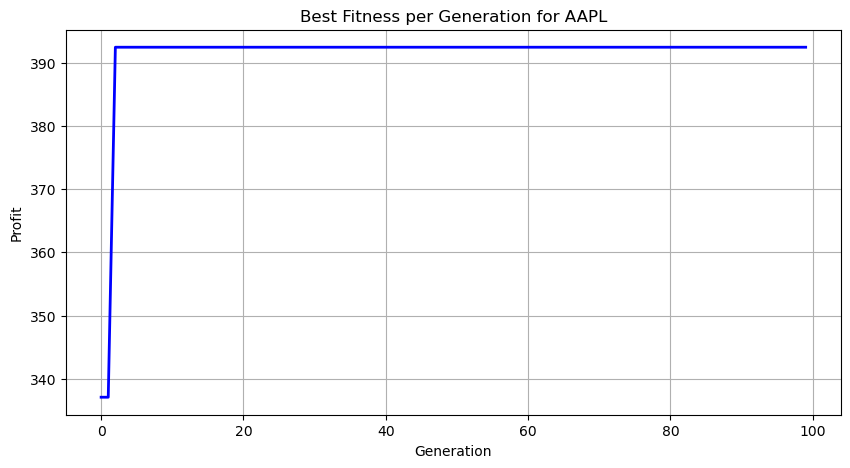

[*********************100%%**********************]  1 of 1 completed
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


best profit for  AAPL  with funds  1000  is  392.42019925975296 


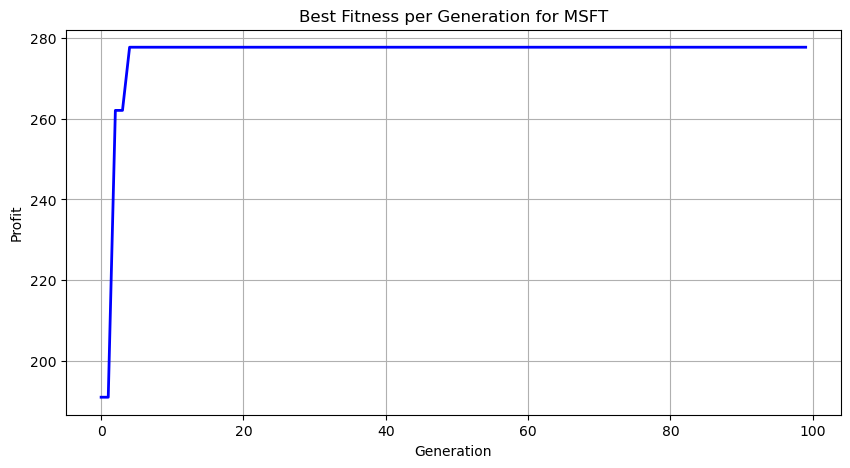

[*********************100%%**********************]  1 of 1 completed

best profit for  MSFT  with funds  1000  is  277.72025960327005 



c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


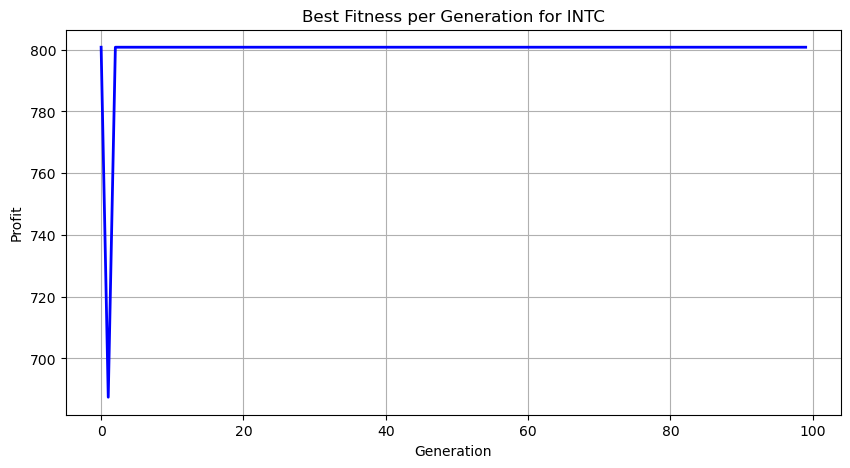

[*********************100%%**********************]  1 of 1 completed

best profit for  INTC  with funds  1000  is  800.8032465678639 



c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


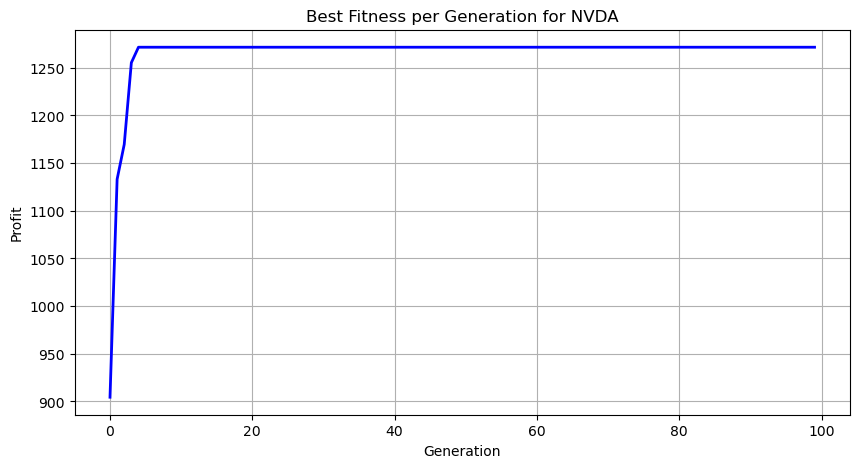

best profit for  NVDA  with funds  1000  is  1271.5897267468804 


2742.5334321777673

In [15]:
import random
from deap import base, creator, tools, algorithms
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data
def fetch_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    return data['Close']

# Fitness function to maximize
def evaluate(individual, price_data, initial_investment):
    buy_price = price_data[individual[0]]
    sell_price = price_data[individual[1]]
    # Calculate the number of shares that can be bought with the initial investment
    shares = initial_investment / buy_price
    # Calculate the total value after selling the shares
    final_value = shares * sell_price
    # Profit is the difference in value
    profit = final_value - initial_investment
    return profit,

# Genetic algorithm setup
def setup_ga(price_data, initial_investment):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_int", random.randint, 0, len(price_data) - 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.attr_int, 2)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evaluate, price_data=price_data, initial_investment=initial_investment)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

def exec(ticker, investment = 1000):
    stock_symbol = ticker
    start_date = '2022-04-10'
    end_date = '2023-04-15'
    initial_investment = investment  # $10,000 initial investment

    price_data = fetch_data(stock_symbol, start_date, end_date).tolist()

    toolbox = setup_ga(price_data, initial_investment)

    population = toolbox.population(n=50)
    NGEN = 100
    best_fitness = []
    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring, k=len(population))

        # Extract and display the best individual from each generation
        best_ind = tools.selBest(population, 1)[0]
        best_ind = tools.selBest(population, 1)[0]
        best_fitness.append(best_ind.fitness.values[0])
        
    plt.figure(figsize=(10, 5))
    plt.plot(best_fitness, color='blue', linewidth=2)
    plt.title('Best Fitness per Generation for ' + ticker)
    plt.xlabel('Generation')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.show()
    best_ind = tools.selBest(population, 1)[0]
    best_profit = evaluate(best_ind, price_data, initial_investment)[0]
    print("best profit for ", ticker, " with funds ", investment, ' is ', best_profit, end=' ')
    print()
    return best_profit


# if __name__ == "__main__":
x = [exec('AAPL'),
exec('MSFT'),
exec('INTC'),
exec('NVDA')]

sum(x)